In [50]:
library(tidyverse)
library(repr)
options(repr.matrix.max.rows = 6)
library(testthat)
library(digest)
library(tidymodels)
library(GGally)

In [51]:
weather_data <- read.csv("https://www.dropbox.com/s/2vo6d6ynrsxpavp/PRSA_Data_Tiantan_20130301-20170228.csv?dl=1")
weather_data

No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,2013,3,1,0,6,6,4,8,300,81,-0.5,1024.5,-21.4,0,NNW,5.7,Tiantan
2,2013,3,1,1,6,29,5,9,300,80,-0.7,1025.1,-22.1,0,NW,3.9,Tiantan
3,2013,3,1,2,6,6,4,12,300,75,-1.2,1025.3,-24.6,0,NNW,5.3,Tiantan
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
35062,2017,2,28,21,18,32,4,48,500,48,10.8,1014.2,-13.3,0,NW,1.1,Tiantan
35063,2017,2,28,22,15,42,5,52,600,44,10.5,1014.4,-12.9,0,NNW,1.2,Tiantan
35064,2017,2,28,23,15,50,5,68,700,21,8.6,1014.1,-15.9,0,NNE,1.3,Tiantan


`summarise()` has grouped output by 'year', 'month'. You can override using the
`.groups` argument.


TEMP,PRES,DEWP,RAIN,WSPM,PM2.5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.3250000,1028.783,-21.46667,0,3.3083333,8.62500
0.4916667,1028.850,-16.96250,0,0.7916667,31.70833
4.9875000,1016.458,-12.31250,0,1.2250000,98.04167
⋮,⋮,⋮,⋮,⋮,⋮
7.245833,1018.812,-10.754167,0,1.825000,10.20833
7.208333,1020.337,-8.258333,0,1.566667,24.16667
10.958333,1014.888,-12.783333,0,2.058333,14.87500


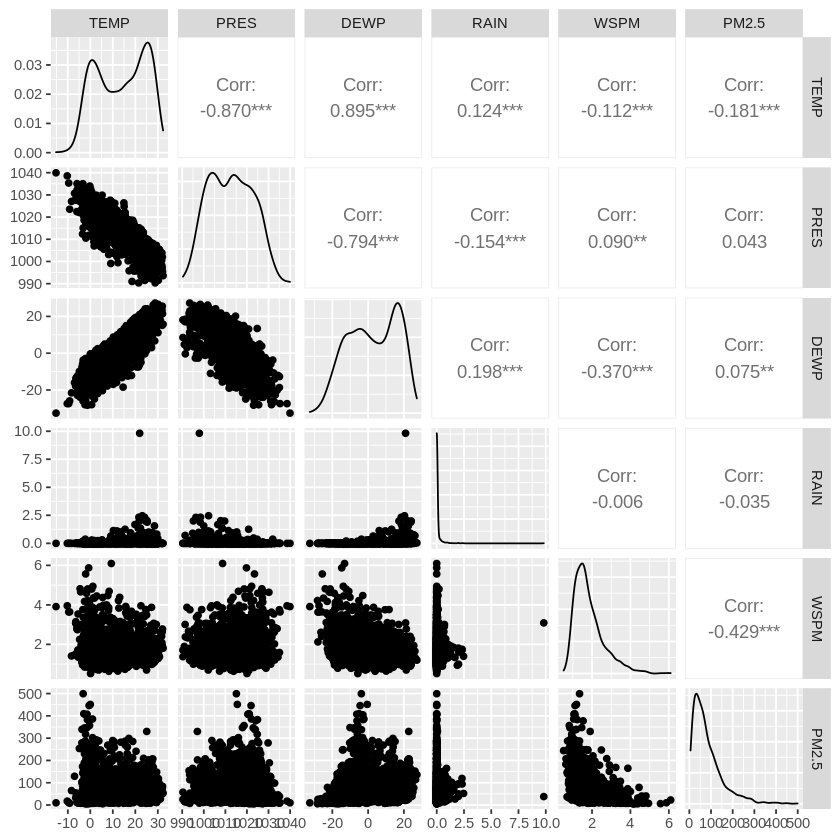

In [52]:
tidy_data <- weather_data |> group_by(year, month, day) |> 
summarize(TEMP = mean(TEMP), PRES = mean(PRES), DEWP = mean(DEWP), RAIN = mean(RAIN), WSPM = mean(WSPM), PM2.5 = mean(PM2.5)) |> ungroup() |> select(-year, -month, -day) |> na.omit()

tidy_data
ggpairs(tidy_data)